<a href="https://colab.research.google.com/github/smlra-kjsce/Pytorch-101-2023/blob/main/Linear_and_Logistic_Regression_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Linear Regression 


## Step 1 - Making Dataset

In [2]:
# Making random dataset from sklearn.datsets
x_np , y_np = datasets.make_regression(n_samples=100,n_features=1,noise=10,random_state=1)

# Since the x_np and y_np are in numpy array form, we convert them to pytorch tensor
x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

In [3]:
# We try to see the shape of the s and y tensor so that they are of valid dimension.

print(x.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100])


We see that y is of shape [100] so we convert it to shape [100,1] so that we can easily feed it to the model. 

In [4]:
# We convert y of hsape 100 to (100,1) and see the shape 

y = y.view(y.shape[0],1)
print(y.shape)

torch.Size([100, 1])


## Step 2 - Designing Model


In [5]:
# We try to understand the input and output size and make a model out of it

# the no of featrues that each data-point has becomes out input size as any input will have that many values. 
# Eg. if no. of features is 2, we will have input of the form (a,b)
no_of_samples, no_of_features = x.shape
input_size = no_of_features

# The ouput size will be the shape of each of the given y.
output_size = y.shape[1]

print("Input size is " + str(input_size))
print("Output size is " + str(output_size))

# We construct a linear model with the given input and output sizes
model = nn.Linear(input_size,output_size)

Input size is 1
Output size is 1


## Step 3 - Defining loss and optimizer 

In [6]:
# Loss and Optimizer 

learning_rate = 0.01 
epochs = 1000

# We take the standard mean squared loss
model_loss = nn.MSELoss()

# We take the SGD (Stochastic Gradient Descent) 
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

## Step 4 - Training Loop

In [7]:
# Here we take all the components together and put them in a training loop.

for epoch in range(epochs):
  # Forward pass
  y_hat = model(x)
  loss = model_loss(y_hat,y)

  # Backward pass
  loss.backward()

  # Update weights
  optimizer.step()
  optimizer.zero_grad()

  # Printing it at every 10 epochs
  if (epoch%10 == 0):
    print("Epoch " + str(epoch))
    print("Loss " + str(loss.item()))


Epoch 0
Loss 5386.3017578125
Epoch 10
Loss 3933.388427734375
Epoch 20
Loss 2880.792236328125
Epoch 30
Loss 2117.4716796875
Epoch 40
Loss 1563.430908203125
Epoch 50
Loss 1160.9573974609375
Epoch 60
Loss 868.3634643554688
Epoch 70
Loss 655.5015869140625
Epoch 80
Loss 500.54449462890625
Epoch 90
Loss 387.6737976074219
Epoch 100
Loss 305.4141540527344
Epoch 110
Loss 245.43414306640625
Epoch 120
Loss 201.67941284179688
Epoch 130
Loss 169.7476043701172
Epoch 140
Loss 146.4349822998047
Epoch 150
Loss 129.40951538085938
Epoch 160
Loss 116.97154235839844
Epoch 170
Loss 107.88228607177734
Epoch 180
Loss 101.23873138427734
Epoch 190
Loss 96.38138580322266
Epoch 200
Loss 92.8293228149414
Epoch 210
Loss 90.231201171875
Epoch 220
Loss 88.33063507080078
Epoch 230
Loss 86.93998718261719
Epoch 240
Loss 85.9223861694336
Epoch 250
Loss 85.17759704589844
Epoch 260
Loss 84.63243865966797
Epoch 270
Loss 84.2333755493164
Epoch 280
Loss 83.94120025634766
Epoch 290
Loss 83.72725677490234
Epoch 300
Loss 83.5706

## Step 5 - Plot the graph

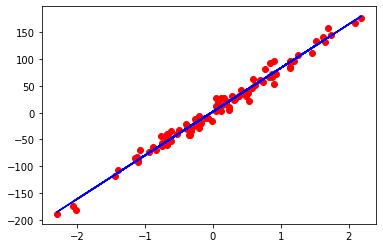

In [8]:
# We first unwrap the predictions into a array named y_predicted
y_predicted = model(x).detach().numpy()

# We plot the original points
plt.scatter(x_np,y_np,color="red")

# We plot the predictions 
plt.plot(x_np,y_predicted,color="blue")
plt.show()

# Logistic Regression

## Step 1 - Data Pre-processing 

In [9]:
data = datasets.load_wine()

print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [10]:
# We try to understand the size of out dataset

# We first load the data and target
x,y = data.data, data.target

# We find the no. of features and data-points
no_of_samples, no_of_features = x.shape
print(x.shape)
print(y.shape)

(178, 13)
(178,)


We can see that there are 178 datapoints having 13 features each. Since y is of zero dimesnions, we rehshape it to (178,1)

In [11]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(178, 1)


We see that our dataset contains 3 different values of 'y', 0,1 and 2. This will create a problem as logistic regression works well with only binary classification. So, we remove the data points having class '1' and rename the class '2' as class '1'  

In [12]:
# We create an empty list consisting of all the indices that need to be deleted, i.e. all indices having y value as 1
to_be_deleted = []

# In the for loop, we append the indices having y=1 to the above list 'to_be_deleted' and replce those with y=2 as y=1
for i in range (len(y)):
  if y[i]==1:
    to_be_deleted.append(i)
  if y[i]==2:
    y[i]=1

# We delete the indices present in to_be_deleted from x and y using np.delete
# Note that axis=0 means rowwise deletion and axis=1 means column wise
x = np.delete(x,to_be_deleted,axis=0)
y = np.delete(y,to_be_deleted,axis=0)
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [13]:
print(y.shape)
print(x.shape)

(107, 1)
(107, 13)


In [14]:
# We split the dataset into training and testing with the help of sklearn library

# Note: Do not change the order of x_train,x_test,t_train,y_test as the function returns it in that order itself
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 13)
(11, 13)
(96, 1)
(11, 1)


Since we are dealing with logistic regression, it is recommened to scale our data. We use standard scaler which will scale the data such that the mean of the data points is zero and the standard deviation is one. 

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
# Having completed the preprocessing, we convert the numpy arrays to torch tensors so that we can use pytorch models. 

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print(y_test.shape)

torch.Size([11, 1])


## Step 2 - Model

Logistic Regression is essentially Linear regression with a sigmoid layer in it. 

As shown, torch.nn.Linear layer is a single neuron. 

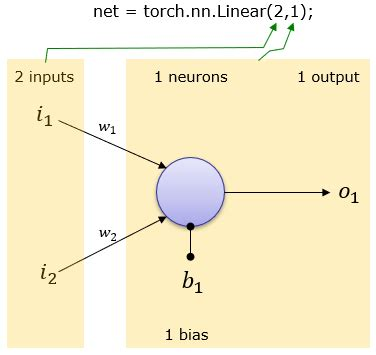

The sigmoid function is shown as follows. In logistic regression, the sigmoid function is applied to the output of linear layer. 
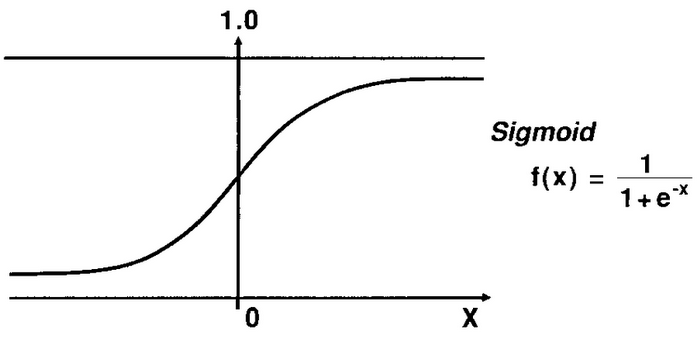

Before diving in t the model, lets understand the __ init __ and self used exensively in pytorch models. 


In [17]:
# We define a class named smlra and the __init__ function in it.  
class smlra(object):
  x = 100
  def __init__(self):
    self.x = 200

# We import the class variables directly without initializing the class
print(smlra.x)

# When the object of the class is created i.e., here A is object and smlra is the class, then __init__ gets automatically called
# __init__ is similar to class constructors in other object oriented programming languages
A = smlra()
print(A.x)

# self is a hidden parameter which is passed evrytime the methods of the object are called.
# In other programming languages, self is automatically passed, while in python, we have to declare it. 

100
200


In [18]:
# We define our logistic regression class here

class LogisticRegression(nn.Module): 

  # __init__ method of our LogisticRegression class is the simple linear regression layer 
  def __init__(self,no_of_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(no_of_input_features,1)              #This is because the output size is 1 (essentially between 0 and 1 as it is Logistic)
  
  # The forward method of our LogisticRegression class is built on the top of __init__ and is essentailly applies sigmoid layer on the linear layer
  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [19]:
model = LogisticRegression(no_of_features)

## Step 3 - Optimizer and Loss

Since it is a logistic regression, we take the binary cross-entropy loss for back-propagation 

In [20]:
# We first define the learning rate and the number of epochs
learning_rate = 0.01
epochs = 100

# We then define the loss and the optimizer function
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Step 4 - Training

In [21]:
for epoch in range(epochs):

  # Forward pass
  y_predicted = model(x_train)

  # Backward pass
  l = loss(y_predicted,y_train)
  l.backward()

  # Weights updated
  optimizer.step()
  optimizer.zero_grad()

  if (epoch%10==0):
    print(l)
  

tensor(0.7708, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6208, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5122, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4322, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3721, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3258, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2894, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2601, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2361, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2162, grad_fn=<BinaryCrossEntropyBackward0>)


In [22]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=81c4815aceb6308a22d20109d42422e2a43fbe86df38a3be989a3e1232684945
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


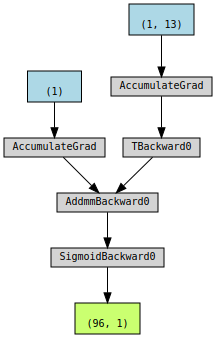

In [23]:
from torchviz import make_dot
make_dot(y_predicted)

## Step 5 - Test and Plotting

In [24]:
# We predict the x_test things and since the sigmoid function gives a vale between 0 and 1, we round it off to get the desired classes
with torch.no_grad():
  y_pred = model(x_test)
  y_predicted_classes = y_pred.round()

# We print the actual classes and the predicted classes and see that the accuracy is 100% (due to small dataset)
print(y_test)
print(y_predicted_classes)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])


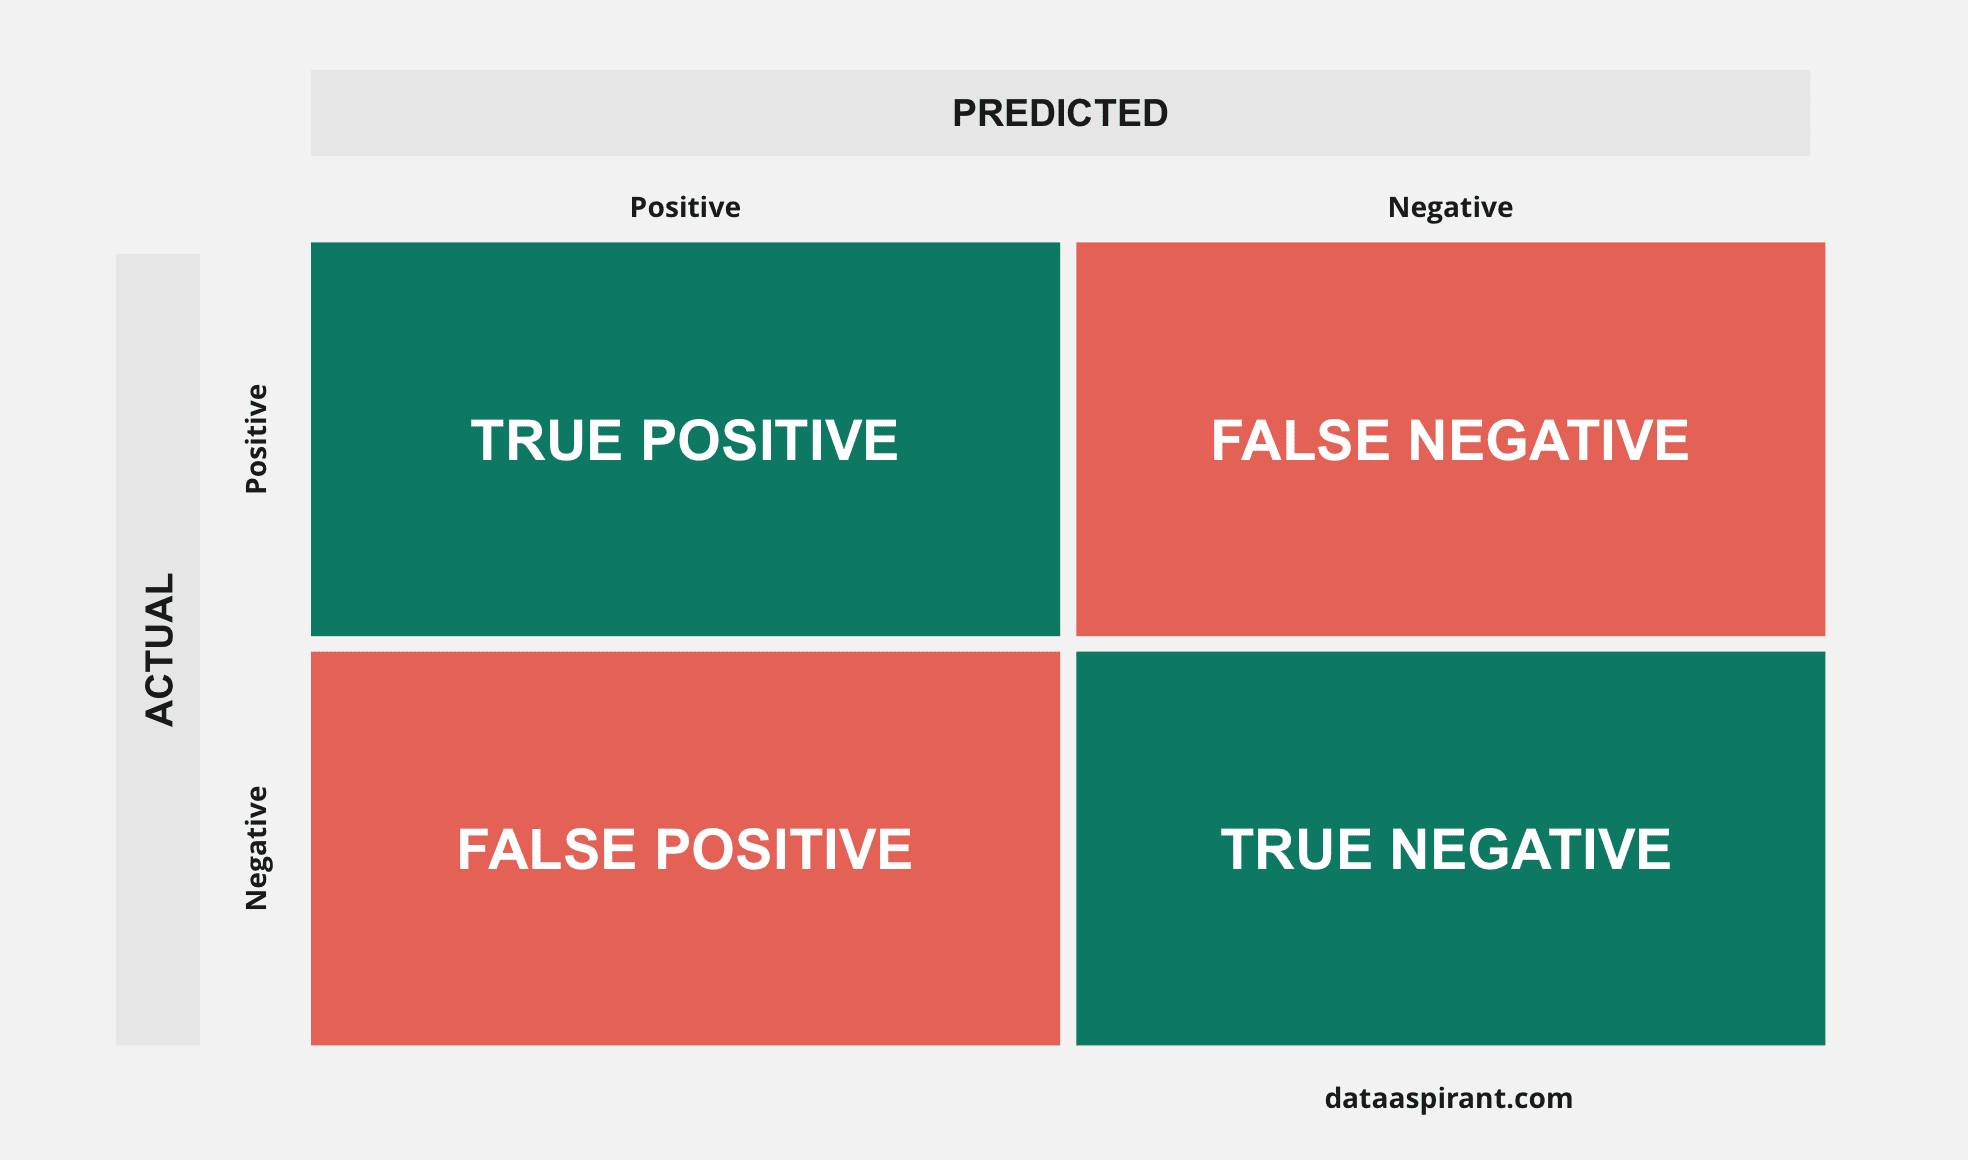

In [25]:
# We print the confusion matrix.
# In confusion matrix, the values along the diagonal are correctly predicted and others are wrongly predicted, which in our case is 0.
print(confusion_matrix(y_test,y_predicted_classes))

[[4 0]
 [1 6]]
